# AirBnB Listings Analysis

## *Objective 1: Data Prep and QA* 


- Read in the AirBnB Data


In [95]:
import pandas as pd

# Python ran into issues reading the data which were fixed with the `encoding` and `low_memory parameters`.
listings = pd.read_csv('Listings.csv', encoding = ' ISO-8859-1', low_memory = False)

In [8]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [97]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

- Cast any date columns as a datetime format.


In [99]:
listings['host_since'] = pd.to_datetime(listings['host_since'])
# Can also be done in the beginning when reading in the data. Use 'parse_dates = [column_name]'.

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

- Filter down the data to just listings in the city of Paris.


In [166]:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']])

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


- QA the Paris listings data: Check for missing values, and calculate the minimum, maximum, and average for each numeric field.

In [173]:
# Checking for missing values
## Not a signifcant amount of missing values to worry about. They will be ignored.
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [175]:
# Calculating the min, max, and avg values of our numeric columns.
paris_listings[['accommodates', 'price']].describe().round(2)

,accommodates,price
count,64690.00,64690.00
mean,3.04,113.10
std,1.59,214.43
min,0.00,0.00
25%,2.00,59.00
50%,2.00,80.00
75%,4.00,120.00
max,16.00,12000.00


In [107]:
#Examining the '0' values that appeared for accommodates and price.
paris_listings.query('price == 0 and accommodates == 0').count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [109]:
paris_listings.query('price == 0').count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [111]:
paris_listings.query('accommodates == 0').count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

## Objective 2: Prepare for Visualization


- Create a DataFrame called `paris_listings_neighborhood`. Group the Paris listings by `neighbourhood` and calculate the average price for each. Sort the price in ascending order.

In [177]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby('neighbourhood')
    .agg({'price': 'mean'})
    .sort_values('price')
    .round(2)
)

paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.64
Palais-Bourbon,156.86
Passy,161.14
Louvre,175.38
Elysee,210.54


- Create a DataFrame called `paris_listings_accommodations`. Filter your data down to the most expensive neighbourhood in Paris. Group it by `accomodates` and calculate the average price for each. Sort the price in ascending order.

In [179]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({'price':'mean'})
    .sort_values('price')
    .round(2)
)
paris_listings_accommodates.head()

,price
accommodates,
0,0.00
1,79.52
3,152.83
2,155.10
4,212.10


- Finally, create a DataFrame called `paris_listings_over_time`. Group the data by the year component of `host_since`. Calculate a count of rows to get the number of new hosts fo each year, and the average price of listings for each year.

In [181]:
paris_listings_over_time = (
    paris_listings
    .set_index('host_since')
    .resample('Y')
    .agg({'neighbourhood': 'count', 
          'price':'mean'})
    .round(2)
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.75
2009-12-31,106,159.64
2010-12-31,416,125.03
2011-12-31,1339,124.83
2012-12-31,4592,111.58


# Objective 3: Visualize the Data

- Build a horizontal bar chart of the average rent price by neighbourhood. Which neighbourhoods stand out?

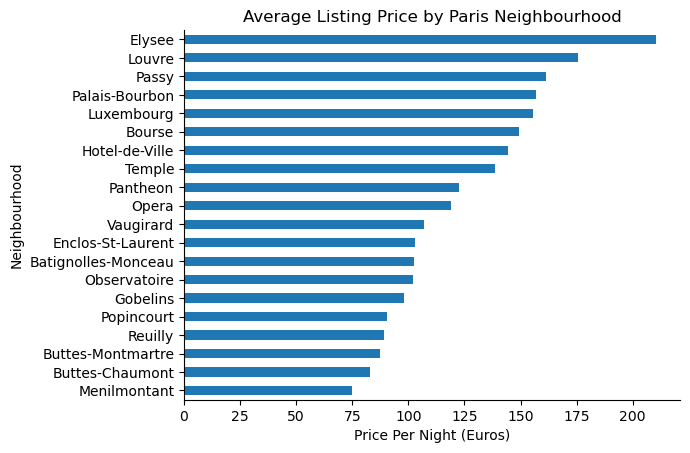

In [193]:
# Elysee stands out significantly not only as the most expensive neighbourhood, but also 
# as the most expesnive by a large margin.
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
     title = 'Average Listing Price by Paris Neighbourhood', 
     xlabel = 'Price Per Night (Euros)', 
     ylabel = 'Neighbourhood', 
     legend = None)
)

sns.despine()

- Build a horizontal bar chart of the price of accommodates in the most expensive neighbourhood. Are the results the same?

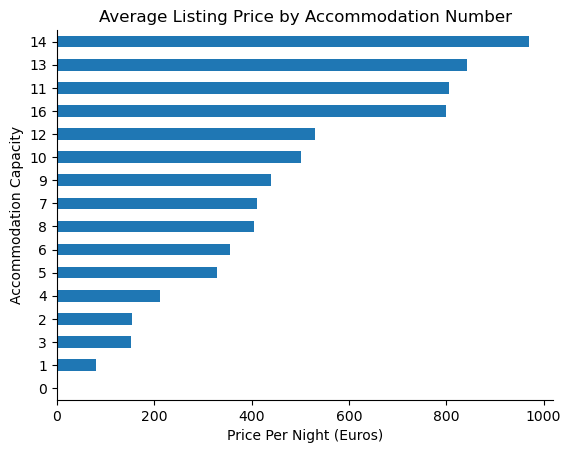

In [185]:
import seaborn as sns

(paris_listings_accommodates
 .plot
 .barh(
     title = 'Average Listing Price by Accommodation Number', 
     xlabel = 'Price Per Night (Euros)', 
     ylabel = 'Accommodation Capacity', 
     legend = None)
)

sns.despine()

- Finally, build line charts of new hosts per year and average price by year. What happened to new hosts in 2015? Was the average price impacted?

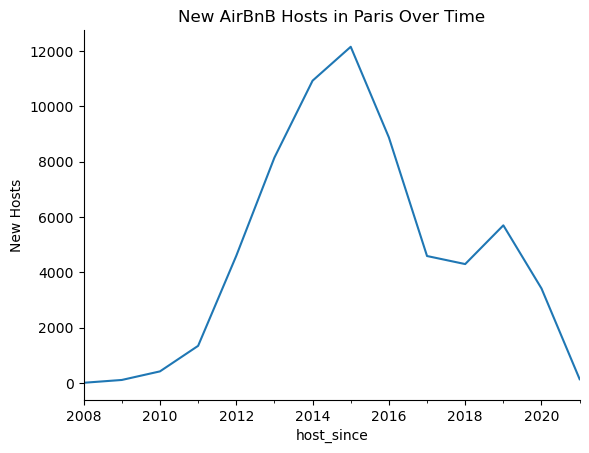

In [187]:
# The year 2015 shows a dramatic fall in new hosts with a slight 
# rise in 2019 before the drop continues.
paris_listings_over_time['neighbourhood'].plot(
    ylabel = 'New Hosts', 
    title = 'New AirBnB Hosts in Paris Over Time'
)

sns.despine()

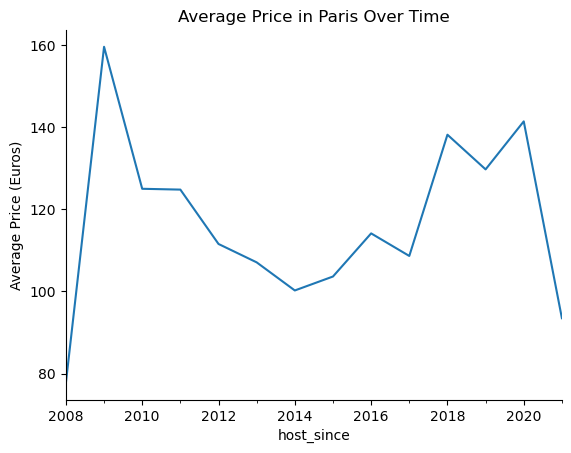

In [189]:
# The average price appears to peak around 2009 before dropping, 
# bottoming out in 2014, and reaching new highpoints in 2018 and 2020
# before falling further.
paris_listings_over_time['price'].plot(
    ylabel = 'Average Price (Euros)', 
    title = 'Average Price in Paris Over Time'
)

sns.despine()

- Challenge: Plot both times series charts in a dual axis line chart.

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts and Higher Prices')

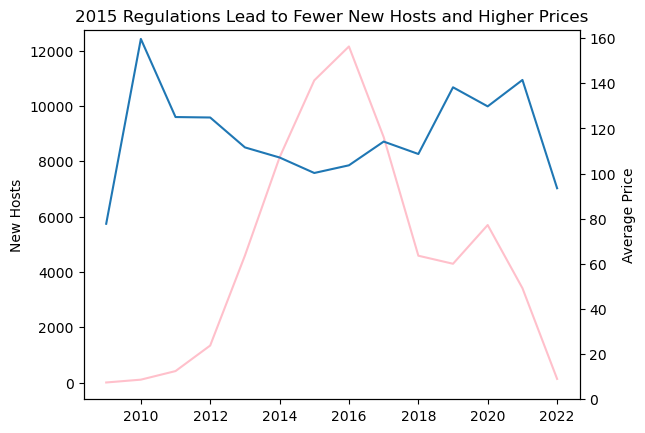

In [191]:
# Viewing both charts together shows an inverse relationship between 
# pricing and the number of available hosts. As the number of hosts
# increases, the price drops accordingly which can be seen from
# 2015-2016 and again in 2019-2020 before both fall 
# concurrently afterwards.
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index, 
    paris_listings_over_time['neighbourhood'], 
    label = 'New Hosts', 
    c = 'pink'
)

ax.set_ylabel('New Hosts')

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index, 
    paris_listings_over_time['price'], 
    label = 'Average Price'
)
ax2.set_ylim(0)

ax2.set_ylabel('Average Price')

ax.set_title('2015 Regulations Lead to Fewer New Hosts and Higher Prices')